In [1]:
import requests
import urllib.parse
from bs4 import BeautifulSoup
from time import sleep
import copy


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Scraping data on JobsDB with searching a word "data-scientist" on pages 1-5

def get_link(num_pages=5):
    name_job = []
    name_com = []
    href = []
    for i in range(num_pages):
        web = f'https://th.jobsdb.com/th/search-jobs/data-scientist/{i+1}'
        response = requests.get(web)
        print(f'Page {i}')
        # print(response)
        print(response.status_code, response.reason)
        # print(response.headers)

        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        # print(soup.prettify()[0:500])

        jobs = soup.find_all('div', class_="sx2jih0 zcydq876 zcydq866 zcydq896 zcydq886 zcydq8n zcydq856 zcydq8f6 zcydq8eu")
        
        for job in jobs:
            name_job.append(job.h1.text)
            name_com.append(job.h1.next_sibling.text)
            href.append(job.a['href'])
        
        sleep(1)

    df = pd.DataFrame({'name_job':name_job, 'company':name_com, 'link':href})

    return df
    


In [3]:
#scrape data 5 pages in jobsdb with job name, company name and link to main job post
df = get_link(5)
df

Page 0
200 OK
Page 1
200 OK
Page 2
200 OK
Page 3
200 OK
Page 4
200 OK


,name_job,company,link
0,Data Scientist (Work from home),Metro Systems Corporation Public Company Limited,/th/en/job/data-scientist-work-from-home-30000...
1,Data Scientist (Industrial)/นักวิทยาศาสตร์ข้อมูล,"DENSO International Asia Co., Ltd.",/th/en/job/data-scientist-industrial-%E0%B8%99...
2,Audit Delivery Center (ADC) - Associate,KPMG Phoomchai Audit Ltd.,/th/en/job/audit-delivery-center-adc-associate...
3,Data Analyst Manager,FrieslandCampina (Thailand) PCL.,/th/en/job/data-analyst-manager-30000300273906...
4,Data Scientist,KASIKORN Business - Technology Group (KBTG),/th/en/job/data-scientist-300003002743375?toke...
...,...,...,...
145,Data Analytics - Digital Forensic (Senior Cons...,"Deloitte Touche Tohmatsu Jaiyos Co., Ltd.",/th/en/job/data-analytics-digital-forensic-sen...
146,Data Engineer,KASIKORN Business - Technology Group (KBTG),/th/en/job/data-engineer-300003002732350?token...
147,Data & AI Sales Specialist,"IBM Thailand Co., Ltd.",/th/en/job/data-ai-sales-specialist-3000030027...
148,Clinical Data Associate (2 years of contract),"Clinixir Co., Ltd.",/th/en/job/clinical-data-associate-2-years-of-...


In [4]:
#Get more data on a single job post and get the highlights and description topics
def get_high_decs(df):
    highlights = []
    descriptions =[]
    web = 'https://th.jobsdb.com'
    for i in range(len(df)):   
        link = df.iloc[i]['link']
        response = requests.get(f'{web}{link}')
        print(df.iloc[i]['name_job'], df.iloc[i]['company'])
        # print(response)
        print(response.status_code, response.reason)
        # print(response.headers)

        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        # print(soup.prettify()[0:500])
        detail = soup.find_all('div',class_="sx2jih0 zcydq86q zcydq86v zcydq86w zcydq87q zcydq87v zcydq87w zcydq896 zcydq886 _18qlyvc14 _18qlyvc17 zcydq832 zcydq835")

        highlight = []
        description =[]

        topics = detail[0].find_all('h4')
        # print(topics[0].text)
        for i in topics[0].previous_element.previous_element.find('ul'):
            highlight.append(i.text.strip())

        # print(topics[1].text)
        for i in topics[1].previous_element.previous_element.find_all('ul'):
            for j in i:
                description.append(j.text.strip())

        highlights.append(highlight)
        descriptions.append(description)
        print(df.iloc[i]['name_job'], df.iloc[i]['company'],'Finish')
        sleep(0.5)

    df['highlights'] = highlights
    df['description'] = descriptions

In [5]:
get_high_decs(df)
df

Data Scientist (Work from home) Metro Systems Corporation Public Company Limited
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Data Scientist (Industrial)/นักวิทยาศาสตร์ข้อมูล DENSO International Asia Co., Ltd.
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Audit Delivery Center (ADC) - Associate KPMG Phoomchai Audit Ltd.
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Data Analyst Manager FrieslandCampina (Thailand) PCL.
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Data Scientist KASIKORN Business - Technology Group (KBTG)
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Data Scientist Ascend Group Co., Ltd.
200 OK
Series([], Name: name_job, dtype: object) Series([], Name: company, dtype: object) Finish
Data Scientist (Innovation Team) Ban

,name_job,company,link,highlights,description
0,Data Scientist (Work from home),Metro Systems Corporation Public Company Limited,/th/en/job/data-scientist-work-from-home-30000...,"[Machine Learning, Tableau, PowerBI]",[Conduct analysis and provide actionable insig...
1,Data Scientist (Industrial)/นักวิทยาศาสตร์ข้อมูล,"DENSO International Asia Co., Ltd.",/th/en/job/data-scientist-industrial-%E0%B8%99...,"[Fast Growing Career Path, HIgh competitive sa...",[]
2,Audit Delivery Center (ADC) - Associate,KPMG Phoomchai Audit Ltd.,/th/en/job/audit-delivery-center-adc-associate...,"[Analytics work, Understand business problem, ...","[ImplementProvide analytics work, proofs of co..."
3,Data Analyst Manager,FrieslandCampina (Thailand) PCL.,/th/en/job/data-analyst-manager-30000300273906...,"[Data analysis, Business insights, SQL]",[Contribute to the preparation of (strategic) ...
4,Data Scientist,KASIKORN Business - Technology Group (KBTG),/th/en/job/data-scientist-300003002743375?toke...,"[Marketing & Customer Insights / Wealth, Risk ...",[Work in a cross-functional team to define pro...
...,...,...,...,...,...
145,Data Analytics - Digital Forensic (Senior Cons...,"Deloitte Touche Tohmatsu Jaiyos Co., Ltd.",/th/en/job/data-analytics-digital-forensic-sen...,"[Data Analytic, IT security, IT Auditor]","[Digital forensics & Discovery, Cybercrime & I..."
146,Data Engineer,KASIKORN Business - Technology Group (KBTG),/th/en/job/data-engineer-300003002732350?token...,"[Linux, shell,, Java, Cloud technologies, script]","[At KBTG, we build platforms as well as servic..."
147,Data & AI Sales Specialist,"IBM Thailand Co., Ltd.",/th/en/job/data-ai-sales-specialist-3000030027...,"[Data & AI, Software Sales Experience, Effecft...",[Engage new and established clients in a value...
148,Clinical Data Associate (2 years of contract),"Clinixir Co., Ltd.",/th/en/job/clinical-data-associate-2-years-of-...,[Develop & Review: Clinical Data & Work Instru...,[]


In [7]:
#Preprocessing Data
df['all_des'] = df.description.apply(lambda row:" ".join(row))
df.head()
#Stack all words of description together
all_word = " ".join(df.all_des)
all_word[:500]

#in the same way with the description but be highlights instead
df['all_high'] = df.highlights.apply(lambda row:" ".join(row))
all_high = " ".join(df.all_high)
all_high[:500]

'Machine Learning Tableau PowerBI Fast Growing Career Path HIgh competitive salary + bonus after termination Might be permanent after ending the contract Analytics work Understand business problem Teamwork Data analysis Business insights SQL Marketing & Customer Insights / Wealth Risk / Fraud / Credit Scoring / Income Ratings Voice / Speech / Face Recog / Biometrics / Image GLM/Regression, Random Forest, Boosting, Trees R, Python, SQL Redshift, S3, Spark, DigitalOcean Master/Doctoral Degree in IT'

In [8]:
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

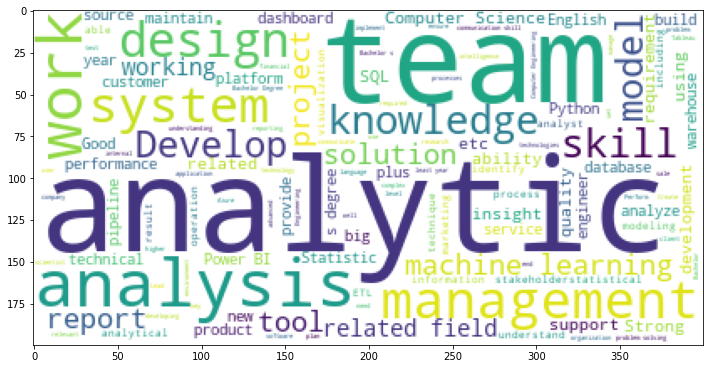

In [9]:
#add some extra stop words that don't need
stop = set(STOPWORDS)
stop.update(['business','data','experience','e','g'])
#create wordcloud with description data
cloud = WordCloud(background_color='white', stopwords = stop, prefer_horizontal=0.9).generate(all_word)
plt.figure(figsize=(12,18))
plt.imshow(cloud)

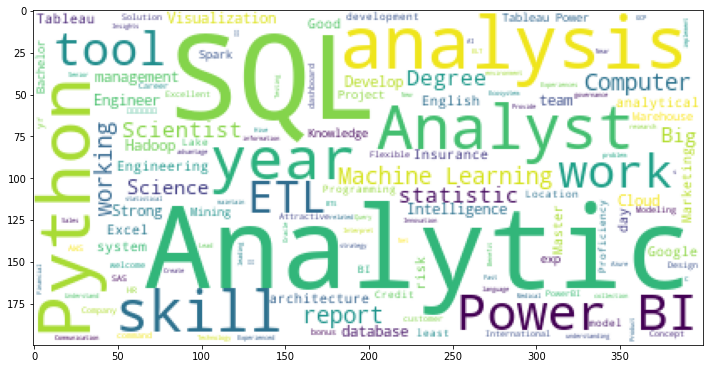

In [10]:
#create wordcloud with highlights data
cloud_1 = WordCloud(background_color='white', stopwords = stop, prefer_horizontal=0.9).generate(all_high)
plt.figure(figsize=(12,18))
plt.imshow(cloud_1)

In [11]:
import spacy

In [12]:
#load spacy pre-train model
nlp = spacy.load("en_core_web_md")
print("Pipeline:", nlp.pipe_names)

#use build-in tagger pos fuction of spacy to extract soft/hard skills
soft_skills = []
hard_skills = []

for row in df.description:
    for topic in row:
        doc = nlp(topic)

        for token in doc:
            if token.pos_ =='ADJ':
                soft_skills.append(token.text)
            elif token.pos_ =='PROPN':
                hard_skills.append(token.text)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [14]:
Top_hard_skills = Counter(hard_skills)
Top_soft_skills = Counter(soft_skills)

sort_hard = sorted(Top_hard_skills.items(), key=lambda x:x[1], reverse=True)
sort_soft = sorted(Top_soft_skills.items(), key=lambda x:x[1], reverse=True)

" ".join([*map(lambda x:x[0],sort_hard)][:200])


'Data SQL Computer BI Science Python Bachelor Analytics Business Power Engineering Tableau Knowledge Azure English Statistics Degree Master Excel AWS Learning Google Microsoft R Machine Technology Oracle Cloud Intelligence IT Information Management Mathematics Hadoop Spark Warehouse MS Engineer Scientist Service Economics Big Retail AI Server Hive SAS Team Finance Thai MIS ETL Develop Analyst Analysis System GCP Studio Dashboard PowerBI Java SSIS Administration Platform Tools VBA Report Development Operations C++ Model CI CD Process PowerPoint Database และ Architecture C SAP Lake Analytic CRM Quality Developer Product Governance HR ML Qlik Redshift Digital KPI Tech Manager Sales Modeling S3 Health Kafka API Annual Company Design QA Monitor . PL Artificial Test Marketing EMR Fraud Monitoring Insurance Banking Tool Research A Mining Apache Propose Strategy Visualization Office LINE Ecosystem Web DevOps PySpark Integration Science/ Testing Head Programming Pivot Access Enterprise data Str

In [15]:
" ".join([*map(lambda x:x[0],sort_soft)][:200])

'Strong related other analytical such statistical new Good technical - large complex relevant key Excellent internal higher big able various least advanced functional high predictive different external multiple strong appropriate financial good actionable quantitative best verbal non Responsible strategic cross social real basic Able ongoing interpersonal plus analytic unstructured more critical organizational efficient deep similar right effective operational Advanced creative structured optimal clear primary equivalent retail professional relational timely regular current digital valuable full Proficient Big Technical online useful excellent global local logical English preferable better artificial secondary positive collaborative necessary Solid open Analytical scalable forensic wide long dynamic common available latest Present Flexible Fluent tight important Great sure own multi agile raw monthly proficient welcome standardized High hoc commercial proper More great numerical major 